# Plot the difference between CB and old WSRT
- This is just a simple plotting code to visualise the files that Thijs made
- fits files made by Thijs

In [1]:
import os
from astropy.io import fits
import pandas as pd
from astropy import modeling
import numpy as np
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.interpolate import RectBivariateSpline
from reproject import reproject_interp

mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [ ]:
date = '190918'
nrows = 7
ncols = 7*2+1
beams = 40


fig = plt.figure(figsize=(12,12.2))
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols, figure=fig) #, width_ratios=[1]*ncols, height_ratios=[1]*nrows, wspace=0.4, hspace=0.7)

# Arrange the plots approx according to beam spacing (only beam 0 really fails)
ax = [None] * beams
for b in range(beams-1,-1,-1):
    if (b <= 39) & (b >= 33):
        ax[b] = fig.add_subplot(gs[0,2*(39-b):2*(39-b)+2])
    if (b <= 32) & (b >= 27):
        ax[b] = fig.add_subplot(gs[1,2*(32-b)+1:2*(32-b)+2+1])
    if (b <= 26) & (b >= 21):
        ax[b] = fig.add_subplot(gs[2,2*(26-b)+2:2*(26-b)+2+2])
    if (b == 0):
        ax[b] = fig.add_subplot(gs[3,2*3:2*3+2])
    if (b <= 20) & (b >= 15):
        ax[b] = fig.add_subplot(gs[4,2*(20-b)+1:2*(20-b)+2+1])
    if (b <= 14) & (b >= 8):
        ax[b] = fig.add_subplot(gs[5,2*(14-b):2*(14-b)+2])
    if (b <= 7) & (b >= 1):
        ax[b] = fig.add_subplot(gs[6,2*(7-b)+1:2*(7-b)+2+1])
    ax[b].set_xticks([])
    ax[b].set_yticks([])

    
for b in range(beams):
    hdu = fits.open('/data/vdhulst/Beams/bm{:02}cor.fits'.format(b))

    data = hdu[0].data
    data2 = data[0,1000:2100,1000:2100]
    #data2 = data[0,:,:]
    #cb = ax[b].imshow(data2, vmin=0.1, vmax=1.2, cmap='jet')
    cb = ax[b].imshow(data2, vmin=0.1, vmax=1.9, cmap='RdBu_r')
    ax[b].set_title('Beam '+str(b).zfill(2))
    ax[b].contour(data2, levels=[0,0.2,.4,.60,.80, 1.0], colors='black')
    ax[b].invert_yaxis()
    circle = plt.Circle((550,550),269, color='r', fill=False, linewidth=3, linestyle='--')
    ax[b].add_patch(circle)

fig.subplots_adjust(right=0.94)
cbar_ax = fig.add_axes([0.95, 0.15, 0.015, 0.7])
cbar =fig.colorbar(cb, cax=cbar_ax)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
#cbar.ax.set_ylabel('e$_{FWHM}$ [km s$^{-1}$]', fontsize=20)

fig.suptitle("190918/old WSRT beam", size=18)    
plt.savefig('/tank/denes/drift_scan/dif_plots/{}_dif_oldwsrt_v2.png'.format(date), bbox_inches="tight", dpi=200)


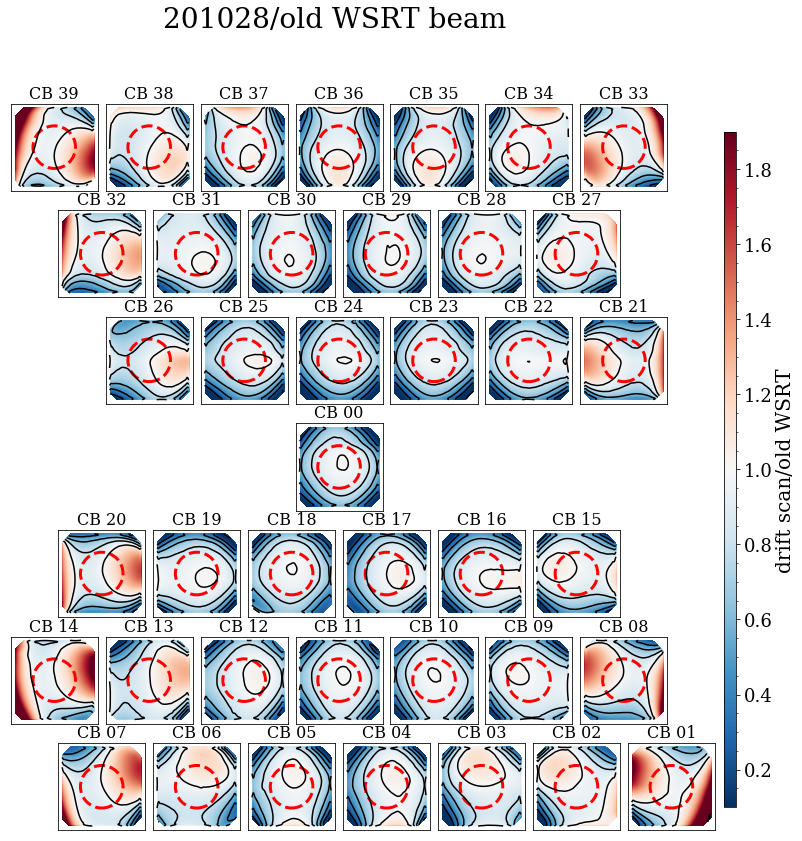

In [19]:
date = '190918'
nrows = 7
ncols = 7*2+1
beams = 40


fig = plt.figure(figsize=(12,13.4))
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols, figure=fig) #, width_ratios=[1]*ncols, height_ratios=[1]*nrows, wspace=0.4, hspace=0.7)

# Arrange the plots approx according to beam spacing (only beam 0 really fails)
ax = [None] * beams
for b in range(beams-1,-1,-1):
    if (b <= 39) & (b >= 33):
        ax[b] = fig.add_subplot(gs[0,2*(39-b):2*(39-b)+2])
    if (b <= 32) & (b >= 27):
        ax[b] = fig.add_subplot(gs[1,2*(32-b)+1:2*(32-b)+2+1])
    if (b <= 26) & (b >= 21):
        ax[b] = fig.add_subplot(gs[2,2*(26-b)+2:2*(26-b)+2+2])
    if (b == 0):
        ax[b] = fig.add_subplot(gs[3,2*3:2*3+2])
    if (b <= 20) & (b >= 15):
        ax[b] = fig.add_subplot(gs[4,2*(20-b)+1:2*(20-b)+2+1])
    if (b <= 14) & (b >= 8):
        ax[b] = fig.add_subplot(gs[5,2*(14-b):2*(14-b)+2])
    if (b <= 7) & (b >= 1):
        ax[b] = fig.add_subplot(gs[6,2*(7-b)+1:2*(7-b)+2+1])
    ax[b].set_xticks([])
    ax[b].set_yticks([])


hdu_beam = fits.open('/tank/denes/drift_scan/WSRT_beam/wsrt_beam.fits')
beam = hdu_beam[0].data

beam_0 = beam[0,0,:,:]
date = '201028'

for b in range(beams):

    hdulist_regrid = fits.open('/tank/denes/drift_scan/{}/cont/{}_{:02}_I_model_reg.fits'.format(date, date, b))
    data_regrid = hdulist_regrid[0].data
    header_regrid = hdulist_regrid[0].header

    data = data_regrid*beam_0
    data2 = data[1000:2100,1000:2100]
    #data2 = data[0,:,:]
    #cb = ax[b].imshow(data2, vmin=0.1, vmax=1.2, cmap='jet')
    cb = ax[b].imshow(data2, vmin=0.1, vmax=1.9, cmap='RdBu_r')
    ax[b].set_title('CB '+str(b).zfill(2), fontsize=16)
    ax[b].contour(data2, levels=[0,0.2,.4,.60,.80, 1.0], colors='black')
    ax[b].invert_yaxis()
    circle = plt.Circle((550,550),269, color='r', fill=False, linewidth=3, linestyle='--')
    ax[b].add_patch(circle)

fig.subplots_adjust(right=0.94)
cbar_ax = fig.add_axes([0.95, 0.15, 0.015, 0.7])
cbar =fig.colorbar(cb, cax=cbar_ax)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.set_label("drift scan/old WSRT", size=20)
#cbar.ax.set_ylabel('e$_{FWHM}$ [km s$^{-1}$]', fontsize=20)

fig.suptitle("201028/old WSRT beam", size=28)    
plt.savefig('/tank/denes/drift_scan/dif_plots/{}_dif_oldwsrt_v3.png'.format(date), bbox_inches="tight", dpi=200)


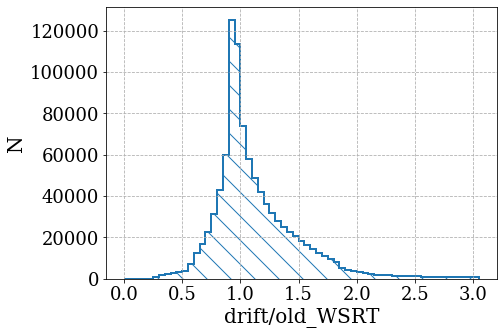

In [16]:
#plot the cold gas fraction

fig = plt.figure(figsize=(7.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

data3 = data2.reshape(1210000)


ax = fig.add_subplot(1,1,1)
ax.grid(True, linestyle='--')
plt.hist(data3, bins=np.arange(0,3.1,0.05), histtype='step', color='C0', hatch='\\', linewidth=2)
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
#ax.set_ybound(0, 20)
ax.set_xlabel('drift/old_WSRT', size=20,family='serif')
ax.set_ylabel('N', size=20,family='serif')

plt.savefig('/tank/denes/drift_scan/dif_plots/{}_drift_oldwsrt_hist.png'.format(date), bbox_inches='tight', dpi=200)

In [ ]:
# calculate approximate FWHM (36') for the circle

hdu = fits.open('/data/vdhulst/Beams/bm00cor.fits'.format(b))

data = hdu[0].data
h = hdu[0].header
print((36/60)/h['CDELT2']/2)